# Linear Regression with Gradient Descent
In this notebook I will go over the basics of linear regression using gradient descent. To demonstrate this I will fit a line to some linear data. The way we do this is by finding the right coefficients for a linear model. The linear model we are using is $y=m*x+b$ where $m$ is our slope coefficient and $b$ is the intercept coefficient.

Lets start by going over what a linear model is first. **So what is a linear model?** A linear model is a equation we can use to describe the relationship between two points. For example as I mentioned our linear model is $y=m*x+b$. And the relationship we are trying to describe is the relationship between some points $x$ and $y$. By relationship we mean how does our independent variable $x$ relate to out dependent variable $y$.

Now that we have gone over some very basics we can start. But before we can start I will first mention that this notebook will require some basic knowledge of calculus mainly derivatives/gradients. Of course some knowledge of python will be useful to understand this notebook. Before we get started wer are going to import some tools to help us visualize and perform gradient descent.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

# Visualizing the Data
Now let's take a look at our data. As we can see in our dataframe we have some x and y values. But to get a closer look lets try and graph it. 

In [3]:
data.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
# select x and y column
X = data.x 
Y = data.y

Below here we have a look at our data. The blue points is the data which we want to represent with some model. We represent the data with some model by finding the line of best fit for our data. The line of best fit is the line that best expresses a relationship between all the poitnts. As we can see the red line (bad model) below does not represent our data well. We know this because its very far from any of our data. There is also the green line (better model). This line seems to represent our data a lot better but we can still do better than this. In the sections below I will go over how we can learn which parameters (m, b) will give us the best line (model) for our data.

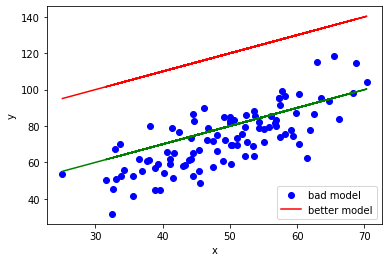

In [5]:
plt.scatter(X, Y, color='b') # the data
plt.plot(X, (1*X)+70, '-', color='red') # random bad parameters
plt.plot(X, (1*X)+30, '-', color='green') # random better parameters
plt.legend(["bad model", "better model"], loc ="lower right")
plt.xlabel('x')
plt.ylabel('y')
plt.show();

# The Math of Gradient Descent
Now that we understand what we are actually trying to achieve we can now get into how to actaully do it. As I mentioned earlier we want to learn which parameters will fit our model best. So our current model is $m*x+b$. Here $x$ represents our data. $m$ represents our slope, and $b$ represents our y intercept. One way of trying to learn which parameters will be good for our data is by randomly setting values for $m$ and $b$. This of course is not a good method because it will take a while to manauly change the values of our model. So this is why we do gradient descent. In calculus the gradient tells .... So what we are going to do is take the negative gradient. But what exactly are we taking the gradient of and why? Since we want to minimize the cost (make the error small) of our model we are going to be taking the gradient of our cost function. And we are doing this to see which $m$ and $b$ values give us the smallest error. So we will be taking the derivative of our cost function with respect to $m$ and $b$. In other words how much does $m$ and $b$ affect our cost. Our cost function in this is going to be this: 
$$ sse = \sum_{i=1}^n (\hat{y}-y)^2 $$

This might look confusing to some but I'll break it down. $\hat{y}$ represents the prediction of our model. $y$ represents the actual value. So what we are doing in subtracting our prediction $\hat{y}$ by the actual value $\hat{y}$ and squaring that differnce. The $\sum_{} $ means we are doing it for all of our data points (from 1 to n where n is the length of our data). Now we can start taking the gradient. The gradient is the vector of partial deritavites and as I mentioned we are taking the partial derivatives of our cost function with respect $m$ and $b$. 

First lets start by breaking down our cost function. Since we know our $\hat{y}$ is our prediction, then we can say:

$$ \hat{y} = m*x+b $$
So our cost function now looks like:

$$ ((m*x+b)-y)^2$$.

Now that we see where our $m$ and $b$ are coming from in our cost function we can take derivatives. When we take partial derivatives every variable thats not the one we care for is treated as constant. First lets take the partial derivative of the cost function $sse$ with respect to $m$.

$$\frac{dsse}{dm} = 2(mx+b - y)\frac{dsse}{dm}(mx+b-y) = 2(mx+b -y)*x = 2(y'-y)x$$
This is the derivative of our cost function with respect to the $m$.
$$\frac{dsse}{dm} = 2(y'-y)x$$
Now lets continue and take the partial derivative of our cost function with respect to $b$.
$$\frac{dsse}{dm} = 2(mx+b - y)\frac{dsse}{db}(mx+b-y) = 2(mx+b -y)(1) = 2(y'-y)$$
So the derivative of our cost function with respect to the $b$.
$$\frac{dsse}{db} = 2(y'-y)$$

These functions below :
$$ b += -(2(y'-y)x) \hspace{10mm} m += -(2(y'-y))$$
Will tell us in which direction we must move our $m$ and $b$ variables to. Should we increase or decrease these values to fit our data. Now we will actually do some code to peform gradient descent.

# Performing Gradient Descent
Now that we gone over some of the math involved in gradient descent its time to implement it in code. Below is the code implementation of gradient descent. I will also graph the model that we get doing gradient descent.

In [6]:
def gradient_descent(X, y, learning_rate=0.000001, epochs=1000):
    """
    Function to perform gradient descent. We do this by getting a prediction with our
    current model (ex, m+X+b). We take the derivative of our cost function with respect
    to 'm' and 'b'. We multiply this by our learning rate which will tell us which direction
    to move by and by how much. Lastly we add that to our current 'm' and 'b' variables. We
    repeat this for as many epochs as we have.
    Parameters
    ----------
    X : dataframe
        The column holding the x values in some linear data in a pandas dataframe. 
    y: dataframe
        The column holding the y values in some linear data in a pandas dataframe. 
    learning_rate : float
        The learning rate out our model (default is at 0.000001)
    epochs: int
        The number of iterations we are going to peform graident descent (default 1000)
    
    Returns
    -------
    int
        The coefficient for m in our linear model with least error.
    int
        The coefficient for b in our linear model with least error.
    """
    m = 0
    b = 0
    for i in range(epochs):
        y_pred = (m*X) + b
        derivative_m = 2 * sum((y_pred-y)*X)
        derivative_b = 2 * sum(y_pred-y)
        m += - learning_rate * derivative_m
        b += - learning_rate * derivative_b
    return m, b

In [7]:
m, b = gradient_descent(X, Y)

Below is a graph that shows our data and the line (model) given by performing gradient descent. As we can see the line is a lot more centered to the entired data meaning the error is much lower. We have now learned the correct value for our paramters `m` and `b`.

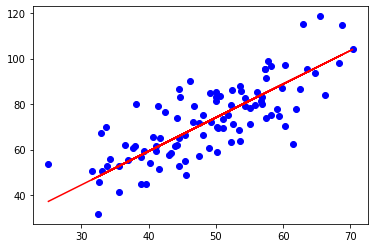

In [8]:
plt.scatter(X, Y, color='b')
plt.plot(X, (m*X)+b, '-', color='red')
plt.show()

# What is Happening While We Train?
We have now learned how we implement gradient descent to learn the best values for our model. Now I am going to visualy explain what happens when we train. To better understand this instead of using two paramters `m` and `b` I am only going to be using `m`. What I will be doing is trying different values for our paramter `m`. I will get the error produced by that value and we will graph that. Below is some code to implement that. 

In [9]:
def sse(X, y, m):
    """Function to get the error of our model with our current coefficient.
    
    Parameters:
    __________
    X : data
        The x values in our data
    y : data
        The y values in our data
    m : int
        The current coefficient for the model
    
    Returns:
    _______
    
    
    """
    y_pred = [((m * x)) for x in X]
    return sum((y_pred - y)**2)

In [10]:
def get_error_by_coefficient(x, y):
    coefficient_errors = []
    for i in range(-4, 6):
        coef_m = i
        error = sse(x, y, coef_m)
        coefficient_errors.append([coef_m, error])
    errors = pd.DataFrame(coefficient_errors, columns=["Coef", "Error"])
    return errors

In [11]:
errors = get_error_by_coefficient(X, Y)

In [12]:
# A dataframe containing the coefficient in one column and the error produced in the other
errors.head()

,Coef,Error
0,-4,7.490330e+06
1,-3,5.009587e+06
2,-2,3.027036e+06
3,-1,1.542677e+06
4,0,5.565108e+05


Here is the graph. 

Below is the graph of the data we just obtained. Every blue dot here is the coefficient (`x`) and the error (`y`). The coefficient that we learned using gradient descent is in red. We can see that that coefficient is the one with the least error. We can also see that the data we got from trying random coefficients forms this upside down bell curve. This makes sense since our error function is raised to the second power. But it also makes sense why our best coefficient `(red dot)` is at the center of it. At that point our slope is 0 which also means our error is zero. It may not actually be zero but its as close to zero as it can. Now if we think about what happens when we train we can think of our model starting at the left and slowly coming down to the center every iteration. This is where the learning rate comes into play. If we set a large learning rate it will overshoot. For example it will go from `coefficient=7` to `coefficient=4`. Instead we want to take small steps into the right direction. We do this by setting a smaller learning rate. 

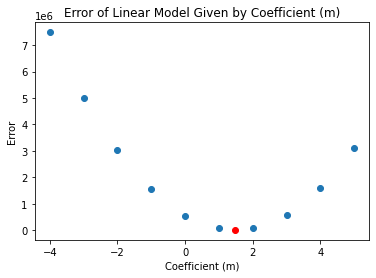

In [13]:
plt.xlabel("Coefficient (m)") # label for x axis
plt.ylabel("Error") # label for y axis
plt.plot(m, sse(X, Y, m), "ro") # our best coefficent and its error
plt.title('Error of Linear Model Given by Coefficient (m)')
plt.scatter(errors["Coef"], errors["Error"]) # other coeficents and their errors

In this notebook I have explained the basics of gradient descent. This is was a very basic example but it is a really important algorithm that can be applied to other parts of deep learning. If you want to learn more about gradien desent you can read more [here](https://en.wikipedia.org/wiki/Gradient_descent)